In [1]:
%autosave 2
%matplotlib inline

Autosaving every 2 seconds


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.metrics import accuracy_score

Imported all the required libraries. To indicate and error, this is an unsupervised algorithm, thus, we won't need the accuracy score. It is because, we don't have any labels to compare to our predictions. 

In [3]:
data2 = loadmat('ex7data2.mat')
X = data2['X']

In [4]:
m, n = X.shape[0], X.shape[1]
m, n

(300, 2)

Loading the data and storing the shape in m2 and n2

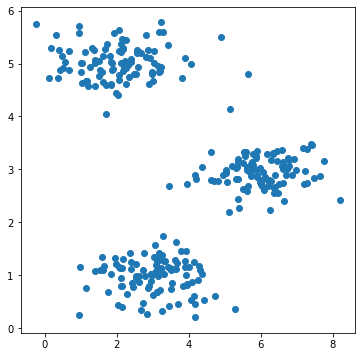

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Plotting the data, we can clearly see that the data is divided into 3 clusters. Generally, the number of clusters has to be decided by the Machine Learning engineer as there is no specific parameter to accurately predict the optimal number of clusters to train. 

As always, we will first train an off the shelf model using sklearn. sklearn supports unsupervised learning too, and the cluster module of sklearn has the KMeans class which we will be using in the following section. 

In [6]:
from sklearn.cluster import KMeans
skmodel = KMeans(n_clusters=3)
skmodel.fit(X)
clusters = skmodel.cluster_centers_
skidx = skmodel.labels_

In [7]:
c0 = (skidx == 0).reshape(m, 1)
c1 = (skidx == 1).reshape(m, 1)
c2 = (skidx == 2).reshape(m, 1)

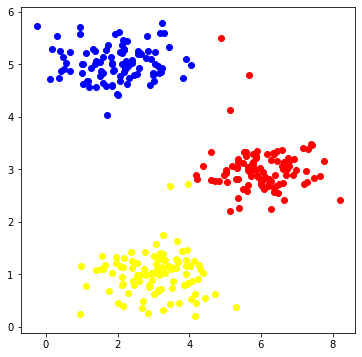

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(X[c0[:, 0], 0], X[c0[:, 0], 1], marker='o', color='red')
plt.scatter(X[c1[:, 0], 0], X[c1[:, 0], 1], marker='o', color='blue')
plt.scatter(X[c2[:, 0], 0], X[c2[:, 0], 1], marker='o', color='yellow')
plt.show()

As we can see, the off the shelf model has accurately clustered the examples in 3 clusters. It is efficient, quick, and gives a reasonable result. 

Now, we will start building the model from scratch using the concepts learned in the course. 

In [9]:
def randIni(X, K):
    m = X.shape[0]
    n = X.shape[1]
    centroids = np.zeros((K, n))
    for i in range(K):
        centroids[i] = X[np.random.randint(0, m - 1), :]
    return centroids
randIni(X, 3)

array([[2.40304747, 5.08147326],
       [1.97619886, 4.43489674],
       [6.5870565 , 3.37508345]])

In [10]:
def findClosestCentroid(X, centroids):
    num_centroids = centroids.shape[0]
    m = X.shape[0]
    n = X.shape[1]
    distances = np.zeros((m, num_centroids))
    for i in range(num_centroids):
        distances[:, i] = np.sum(((X - centroids[i]) ** 2), axis=1)
    idx = np.zeros((m, 1))
    idx[:, 0] = np.argmin(distances, axis=1)
    return idx
#closestCentroid(X2, randIni(X2, 3))
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroid(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])
initial_centroids

Closest centroids for the first 3 examples:
 [[0.]
 [2.]
 [1.]]


array([[3, 3],
       [6, 2],
       [8, 5]])

In [18]:
"""def computeCentroids(X, idx, centroids):
    num_centroids = centroids.shape[0]
    m = X.shape[0]
    n = X.shape[1]
    temp = np.zeros((centroids.shape))
    for i in range(num_centroids):
        examples = (idx==i).reshape(m, 1)
        temp[i] = (np.sum(X[examples[:, 0], :], axis = 0)) / (idx == i).sum()
    return temp
"""
def computeCentroids(X, idx, K):
    m, n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:]+=X[i,:]
        count[index]+=1
    
    return centroids/count
print(initial_centroids)
centroids = computeCentroids(X, idx, initial_centroids.shape[0])
print("Centroids computed after initial finding of closest centroids:\n", centroids)

[[3 3]
 [6 2]
 [8 5]]
Centroids computed after initial finding of closest centroids:
 [[5.81350331 2.63365645]
 [7.11938687 3.6166844 ]
 [2.42830111 3.15792418]]


[[3.00708934 4.67897758]
 [3.81422865 4.73526796]
 [1.8173328  5.13333907]]


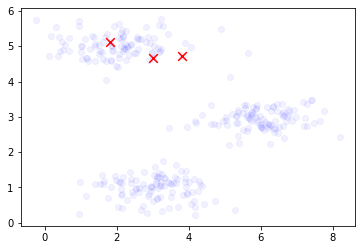

(array([[6.03366736, 3.00052511],
        [1.95399466, 5.02557006],
        [3.04367119, 1.01541041]]),
 array([[2.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],


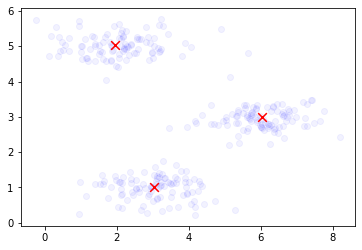

In [19]:
def kmeans(X, K, num_iters):
    centroids = randIni(X, K)
    print(centroids)
    plt.scatter(X[:, 0], X[:, 1], marker='o', color='blue', alpha=0.05)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=75, alpha=1)
    plt.show()
    for i in range(num_iters):
        """plt.scatter(X[:, 0], X[:, 1], marker='o', color='blue', alpha=0.05)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=75, alpha=1)
        plt.show()"""
        idx = findClosestCentroid(X, centroids)
        centroids = computeCentroids(X, idx, K)
    plt.scatter(X[:, 0], X[:, 1], marker='o', color='blue', alpha=0.05)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=75, alpha=1)
    return centroids, idx
kmeans(X, 3, 10)

In [20]:
mat2 = loadmat('bird_small.mat')
A = mat2['A']
X2 = (A/255).reshape(128*128,3)
X2

array([[0.85882353, 0.70588235, 0.40392157],
       [0.90196078, 0.7254902 , 0.45490196],
       [0.88627451, 0.72941176, 0.43137255],
       ...,
       [0.25490196, 0.16862745, 0.15294118],
       [0.22745098, 0.14509804, 0.14901961],
       [0.20392157, 0.15294118, 0.13333333]])

[[0.79215686 0.71764706 0.76078431]
 [0.55294118 0.66666667 0.92941176]
 [0.84313725 0.71764706 0.73333333]
 [0.81960784 0.71764706 0.52941176]
 [0.71372549 0.6745098  0.68627451]
 [0.55294118 0.77254902 0.88235294]
 [0.19215686 0.18823529 0.19215686]
 [0.52941176 0.38823529 0.32941176]
 [0.0627451  0.0627451  0.05098039]
 [0.2        0.21176471 0.22745098]
 [0.83529412 0.7372549  0.48235294]
 [0.78039216 0.6745098  0.71372549]
 [0.69411765 0.40392157 0.12941176]
 [0.87058824 0.81960784 0.62352941]
 [0.46666667 0.25098039 0.2       ]
 [0.69019608 0.58823529 0.61176471]]


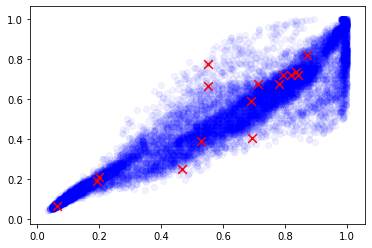

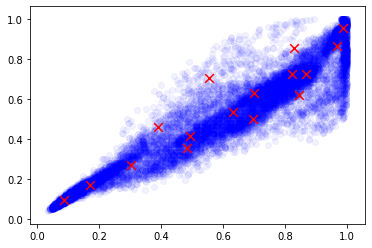

In [21]:
centroids2, idx2 = kmeans(X2, 16, 10)

In [22]:
centroids2

array([[0.84645053, 0.61955931, 0.32490131],
       [0.82439915, 0.72741604, 0.71435449],
       [0.69631736, 0.49929112, 0.22029896],
       [0.9666589 , 0.86573481, 0.64394098],
       [0.48480855, 0.35467999, 0.19193026],
       [0.63210084, 0.5369791 , 0.44276234],
       [0.8296772 , 0.85656306, 0.86077575],
       [0.39058251, 0.46024045, 0.6442393 ],
       [0.98820603, 0.95380242, 0.8160291 ],
       [0.86804598, 0.72473047, 0.46842215],
       [0.70062222, 0.63214641, 0.56513987],
       [0.55524596, 0.70333677, 0.86357069],
       [0.17103054, 0.1703456 , 0.16183378],
       [0.49247448, 0.41511032, 0.37764367],
       [0.08558154, 0.09264158, 0.08246986],
       [0.30205725, 0.26966442, 0.26646261]])

In [23]:
m2,n2 = X2.shape[0],X2.shape[1]
X2_recovered = X2.copy()
for i in range(16):
    X2_recovered[(idx2==i).ravel(),:] = centroids2[i-1]

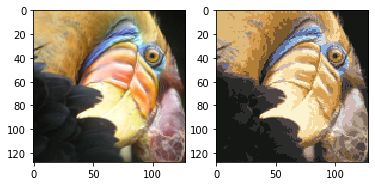

In [24]:
X2_recovered = X2_recovered.reshape(128,128,3)# Display the image
import matplotlib.image as mpimg
fig, ax = plt.subplots(1,2)
ax[0].imshow(X2.reshape(128,128,3))
ax[1].imshow(X2_recovered)